In [66]:
import datetime
import numpy as np
import pandas as pd
from datetime import date
import plotly.express as px
from nsepy import get_history
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [67]:
stock_name = input('Enter NSE Stock Name: ').upper()
date_entry = input('Enter a date in yyyy,m,d format')
year, month, day = map(int, date_entry.split(','))
start_date= datetime.date(year, month, day)
end_date = date.today()
# get_history(symbol = 'SBIN', start=date(2015,1,1), end=date(2022,3,1))
def stock_df(s, sd, ed):
    df = get_history(symbol=s, start=sd, end=ed)
    return df

In [68]:
df = stock_df(stock_name, start_date, end_date)
df.reset_index(inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,6138488,1.925489e+14,58688,1877677,0.3059
1,2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,9935094,3.147389e+14,79553,4221685,0.4249
2,2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,9136716,2.867432e+14,88236,3845173,0.4208
3,2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,15329257,4.677601e+14,169268,7424847,0.4844
4,2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,15046745,4.513243e+14,147185,5631400,0.3743


In [69]:
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.head()

,Open,High,Low,Close,Volume
0,312.45,315.00,310.70,314.00,6138488
1,314.35,318.30,314.35,315.25,9935094
2,316.25,316.80,312.10,312.75,9136716
3,310.00,311.10,298.70,299.90,15329257
4,300.00,302.55,295.15,300.15,15046745


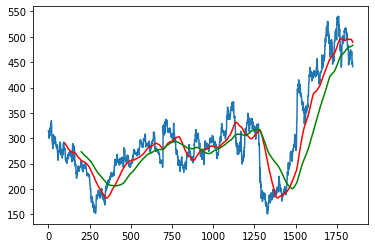

In [70]:
plt.plot(df.Close)
plt.plot(df.Close.rolling(100).mean(), color='red')
plt.plot(df.Close.rolling(200).mean(), color='green')

In [71]:
train_df = pd.DataFrame(df.Close[0:int(len(df.Close)*0.75)])
test_df = pd.DataFrame(df.Close[int(len(df.Close)*0.75):int(len(df))])
train_df.shape, test_df.shape

((1386, 1), (462, 1))

In [72]:
train_df.head()

,Close
0,314.00
1,315.25
2,312.75
3,299.90
4,300.15


In [73]:
test_df.head()

,Close
1386,195.05
1387,203.30
1388,201.90
1389,196.50
1390,193.10


In [74]:
scaler = minmax_scaler = MinMaxScaler(feature_range=(0, 1))
train_df_scaled = scaler.fit_transform(train_df)
test_df_scaled = scaler.fit_transform(test_df)

In [75]:
train_df_scaled

array([[0.73640262],
       [0.74204469],
       [0.73076055],
       ...,
       [0.18099752],
       [0.17964342],
       [0.19386143]])

In [76]:
X_train = []
y_train = []
for i in range(100, len(train_df_scaled)):
    X_train.append(train_df_scaled[i-100 : i])
    y_train.append(train_df_scaled[i, 0])

X_train

[array([[0.73640262],
        [0.74204469],
        [0.73076055],
        [0.6727601 ],
        [0.67388851],
        [0.69510269],
        [0.68765516],
        [0.70525841],
        [0.6962311 ],
        [0.69442564],
        [0.76483864],
        [0.74294742],
        [0.73256601],
        [0.75513428],
        [0.79146919],
        [0.78447303],
        [0.79711126],
        [0.80884676],
        [0.82938389],
        [0.79508012],
        [0.71360867],
        [0.70706387],
        [0.67456556],
        [0.64184157],
        [0.63168585],
        [0.62942902],
        [0.58068156],
        [0.61588806],
        [0.60979463],
        [0.6023471 ],
        [0.70458136],
        [0.70345295],
        [0.69893929],
        [0.68381855],
        [0.68359287],
        [0.65763936],
        [0.65628526],
        [0.65312571],
        [0.62536673],
        [0.6727601 ],
        [0.68065899],
        [0.68223877],
        [0.68494696],
        [0.64545249],
        [0.64522681],
        [0

In [77]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape

(1286, 100, 1)

In [78]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, 
                input_shape=(X_train.shape[1], 1))) # input_shape=(timesteps, features)
model.add(Dropout(0.2))
#layer 2
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.3))
#layer 3
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.4))
#layer 4
model.add(LSTM(units=60, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units = 1))


In [79]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 128)          66560     
                                                                 
 dropout_12 (Dropout)        (None, 100, 128)          0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 100)          91600     
                                                                 
 dropout_13 (Dropout)        (None, 100, 100)          0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 60)           38640     
                                                                 
 dropout_14 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_15 (LSTM)              (None, 60)               

In [80]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=69)

Epoch 1/50
19/19 [==============================] - 17s 538ms/step - loss: 0.0553
Epoch 2/50
19/19 [==============================] - 10s 547ms/step - loss: 0.0174
Epoch 3/50
19/19 [==============================] - 11s 561ms/step - loss: 0.0149
Epoch 4/50
19/19 [==============================] - 12s 624ms/step - loss: 0.0148
Epoch 5/50
19/19 [==============================] - 12s 621ms/step - loss: 0.0147
Epoch 6/50
19/19 [==============================] - 12s 634ms/step - loss: 0.0136
Epoch 7/50
19/19 [==============================] - 13s 698ms/step - loss: 0.0127
Epoch 8/50
19/19 [==============================] - 11s 581ms/step - loss: 0.0128
Epoch 9/50
19/19 [==============================] - 12s 634ms/step - loss: 0.0116
Epoch 10/50
19/19 [==============================] - 11s 580ms/step - loss: 0.0107
Epoch 11/50
19/19 [==============================] - 14s 730ms/step - loss: 0.0099
Epoch 12/50
19/19 [==============================] - 13s 696ms/step - loss: 0.0095
Epoch 13/50
1

In [81]:
train_df.tail(100)

,Close
1286,223.35
1287,215.15
1288,215.20
1289,203.65
1290,209.85
...,...
1381,191.60
1382,191.45
1383,190.95
1384,190.65


In [82]:
past_100 = train_df.tail(100)

In [83]:
final_df = past_100.append(test_df, ignore_index=True)
final_df.head()

C:\Users\chinn\AppData\Local\Temp\ipykernel_3388\2591333897.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100.append(test_df, ignore_index=True)


,Close
0,223.35
1,215.15
2,215.20
3,203.65
4,209.85


In [84]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.18604054],
       [0.16499872],
       [0.16512702],
       [0.13548884],
       [0.15139851],
       [0.07890685],
       [0.08301257],
       [0.10020529],
       [0.1075186 ],
       [0.11573005],
       [0.09250706],
       [0.11803952],
       [0.09160893],
       [0.06325378],
       [0.09122402],
       [0.08249936],
       [0.09468822],
       [0.0837824 ],
       [0.08083141],
       [0.09661278],
       [0.10880164],
       [0.10687708],
       [0.08698999],
       [0.09712599],
       [0.09199384],
       [0.07415961],
       [0.0771106 ],
       [0.08583526],
       [0.1007185 ],
       [0.10174493],
       [0.07185014],
       [0.05016679],
       [0.05196305],
       [0.05106492],
       [0.04054401],
       [0.03746472],
       [0.04118553],
       [0.05966128],
       [0.04387991],
       [0.03990249],
       [0.01141904],
       [0.00500385],
       [0.00654349],
       [0.00282268],
       [0.        ],
       [0.00141134],
       [0.01988709],
       [0.018

In [85]:
input_data.shape

(562, 1)

In [86]:
X_test = []
y_test = []
for i in range(100, len(input_data)):
    X_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])

In [87]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((462, 100, 1), (462,))

In [88]:
y_pred = model.predict(X_test)

In [89]:
scaler.scale_

array([0.00256608])

In [90]:
scale_factor = 1/0.00256608
y_pred = y_pred*scale_factor
y_test = y_test*scale_factor

In [91]:
y_pred.shape, y_test.shape

((462, 1), (462,))

In [92]:
import math
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
rmse

17.93996343508369

Text(0, 0.5, 'Price')

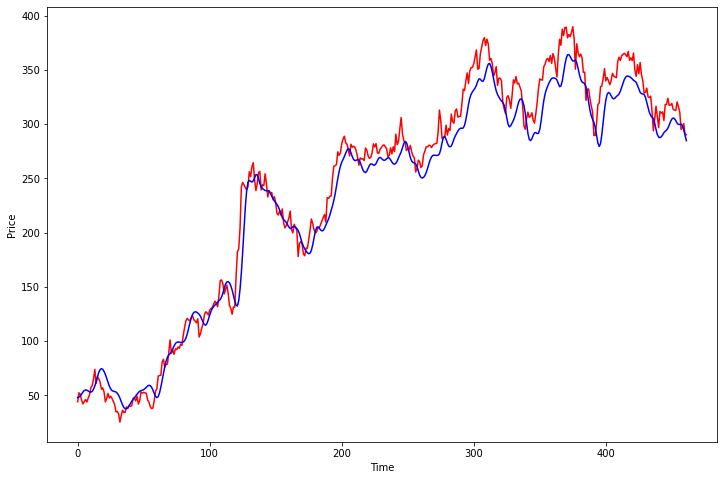

In [93]:
plt.figure(figsize=(12,8))
plt.plot(y_test, color='red', label='Actual')
plt.plot(y_pred, color='blue', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')